Microeconometrics | Summer 2021 | M.Sc. Economics, Bonn University

# Replication of Imai, Masami, and Seitaro Takarabe. 2011. "Bank Integration and Transmission of Financial Shocks: Evidence from Japan."

## Mehmet Emir Kavukcu 

Imai, Masami, and Seitaro Takarabe. 2011. ["Bank Integration and Transmission of Financial Shocks: Evidence from Japan." American Economic Journal: Macroeconomics, 3 (1): 155-83. ](https://www.aeaweb.org/articles?id=10.1257/mac.3.1.155)

# TABLE OF CONTENTS

* 1\. Introduction
* 2\. Identification and the Empirical Approach  
   * 2.1. Land Prices     
   * 2.2. Banking Integration   
   * 2.3. Local Lending and Output  
   * 2.4. Empirical Approach      
* 3\. Replication of the Results   
* 4\. Robustness Checks   
   * 4.1.  -Extentsion- Diagnostics of Panel Data and Estimation Method  
       * 4.1.1.  Diagnostics 1 - The Hausman Test  
       * 4.1.2.  Diagnostics  2 - Testing for cross-sectional dependence/contemporaneous correlation  
       * 4.1.3.  Diagnostics 3 - Testing for Autocorrelation   
   * 4.2. Measurement of Financial Shocks  
   * 4.3. Endogeneity of City Bank Branch Share  
   * 4.4. Unmeasured Correlation between Cities and Local Economies  
       * 4.4.1. Non-City Banks versus City Banks
       * 4.4.2. Differential Sensitivity of Local Economies to City Shocks
       * 4.4.3. Subsample Results    
   * 4.5. -Extension- Systematic Hindrance of Okinawa's Economic Develepoment
* 5\. Conclusion 
* 6\. References 

In [64]:
suppressMessages(library(haven))
suppressMessages(library(plm))
suppressMessages(library(lmtest))
suppressMessages(library(sandwich))
suppressMessages(library(stargazer))
suppressMessages(library(tidyverse))

# 1. INTRODUCTION

In late 1991 Japan underwent a land price bubble collapse which effected the nation-wide economy significantly. There are many macro-economic research papers that try to determine how this financial shock spread across borders. One on side it is argued that the large, diversified banks are partly immune to idiosyncratic errors which is advantageous against a financial shock. However, on the other hand during a land price crisis the value of collaterals depreciate and therefore worsen their creditworthiness. Followingly, the bank might shift capital away from the effected market to the safer ones, hence increasing the volatility and the degree of the crisis. 

Although it is widely accepted that the banking integration is beneficial, there are growing concerns that this might not be the case. For instance, Peek and Rosengren (2000) find out that after the financial collapse US branches of Japanese banks brought down the loan supply and therefore caused an economic decline in the US real estate markets.
The aim of the following paper is to explore whether and to what extent the banking integration contributed to transmit the Japan’s nationwide financial shock between 1980 and 2003 (by using data on branch network of large city banks and the land prices of the commercial sites for each prefecture and major city).

Japan can be considered particularly advantageous on this topic, because of the fact that the land prices in major cities such as Tokyo and Kyoto fell immensely as the land price bubble collapsed. Thus, the large city banks with high involvement in the real estate markets could not meet the financial needs, which in turn worsened the crisis.
Furthermore, this paper investigates the causal effects of the given loan supply by the large city banks on local economies. Doing this might be enlightening on how economically significant the bank lending channel really is and whether it plays a role on transmitting the economic crises.  

Nevertheless, it must be taken into account that this approach is an intranational approach which is not the same with the international approach. It might be misleading to interpret the results of this paper on an international level, as the global banks face different constraints such as different macroeconomic policy and different economical institutions. However, advantages of the within-country approach are twofold. 

1.	The quality of the data concerning a financial crisis and economic benchmarks overall is high compared to a cross-country analysis.
2.	Factors such as macroeconomic policy and institutional quality can be controlled. On a cross-country level analysis correlation related problems between banking integration and the aforementioned factors might arise which might lead to incorrect estimates. 
 
The authors find out that between 1980 and 2003 financially integrated cities compared to the financially isolated ones faced more sensitive credit conditions as a result of the land price changes. Moreover, the loan supply change had significant effects on the local output. Overall, it can be said that the nationwide city banks added volatility to local credit  and economic cycles  by transmitting financial shocks from the cities that experiences volatile land price fluctuations to the local economies.  

The authors use the instrumental variable estimation as the main approach to determine that the price shocks affect the local economies only through shifting the loan supply.


In [65]:
paper_data <- read_dta("data/ImaiTakarabeData.dta")

paper_data_subset <- subset(paper_data, name != "tokyo" & 
                                        name != "osaka" & 
                                        name != "kanagawa" & 
                                        name != "aichi" & 
                                        name != "kyoto" & 
                                        name != "hyogo" & 
                                        name != "hokkaido")


# 2. Identification and the Empirical Approach

The main purpose of the paper is to find out whether and to what extent the banking integration contributed to transmit the Japan’s nationwide financial shock between 1980 and 2003. To that end, the main data of interest can be summarized in three groups. 

## 2.1.	Land Prices 

The authors make use of the fact that business loans with land as collateral is widespread in Japan and therefore the value of the banks’ assets are closely linked with the value of the collateral, therefore the land price can be a possible driver of the financial shock which in turn might affect the quantity of credits given by a bank. Therefore, for the analysis, the price indices for commercial sites in six major cities (Tokyo, Yokohama, Nagoya, Osaka, Kyoto, Kobe) were considered where the large city banks have a large proportion of their assets. 
However, looking at the data it can be clearly seen that the land prices in the aforementioned cities were far more volatile than those in the land. 



### Visual Extentsion 1 - Graph 1 

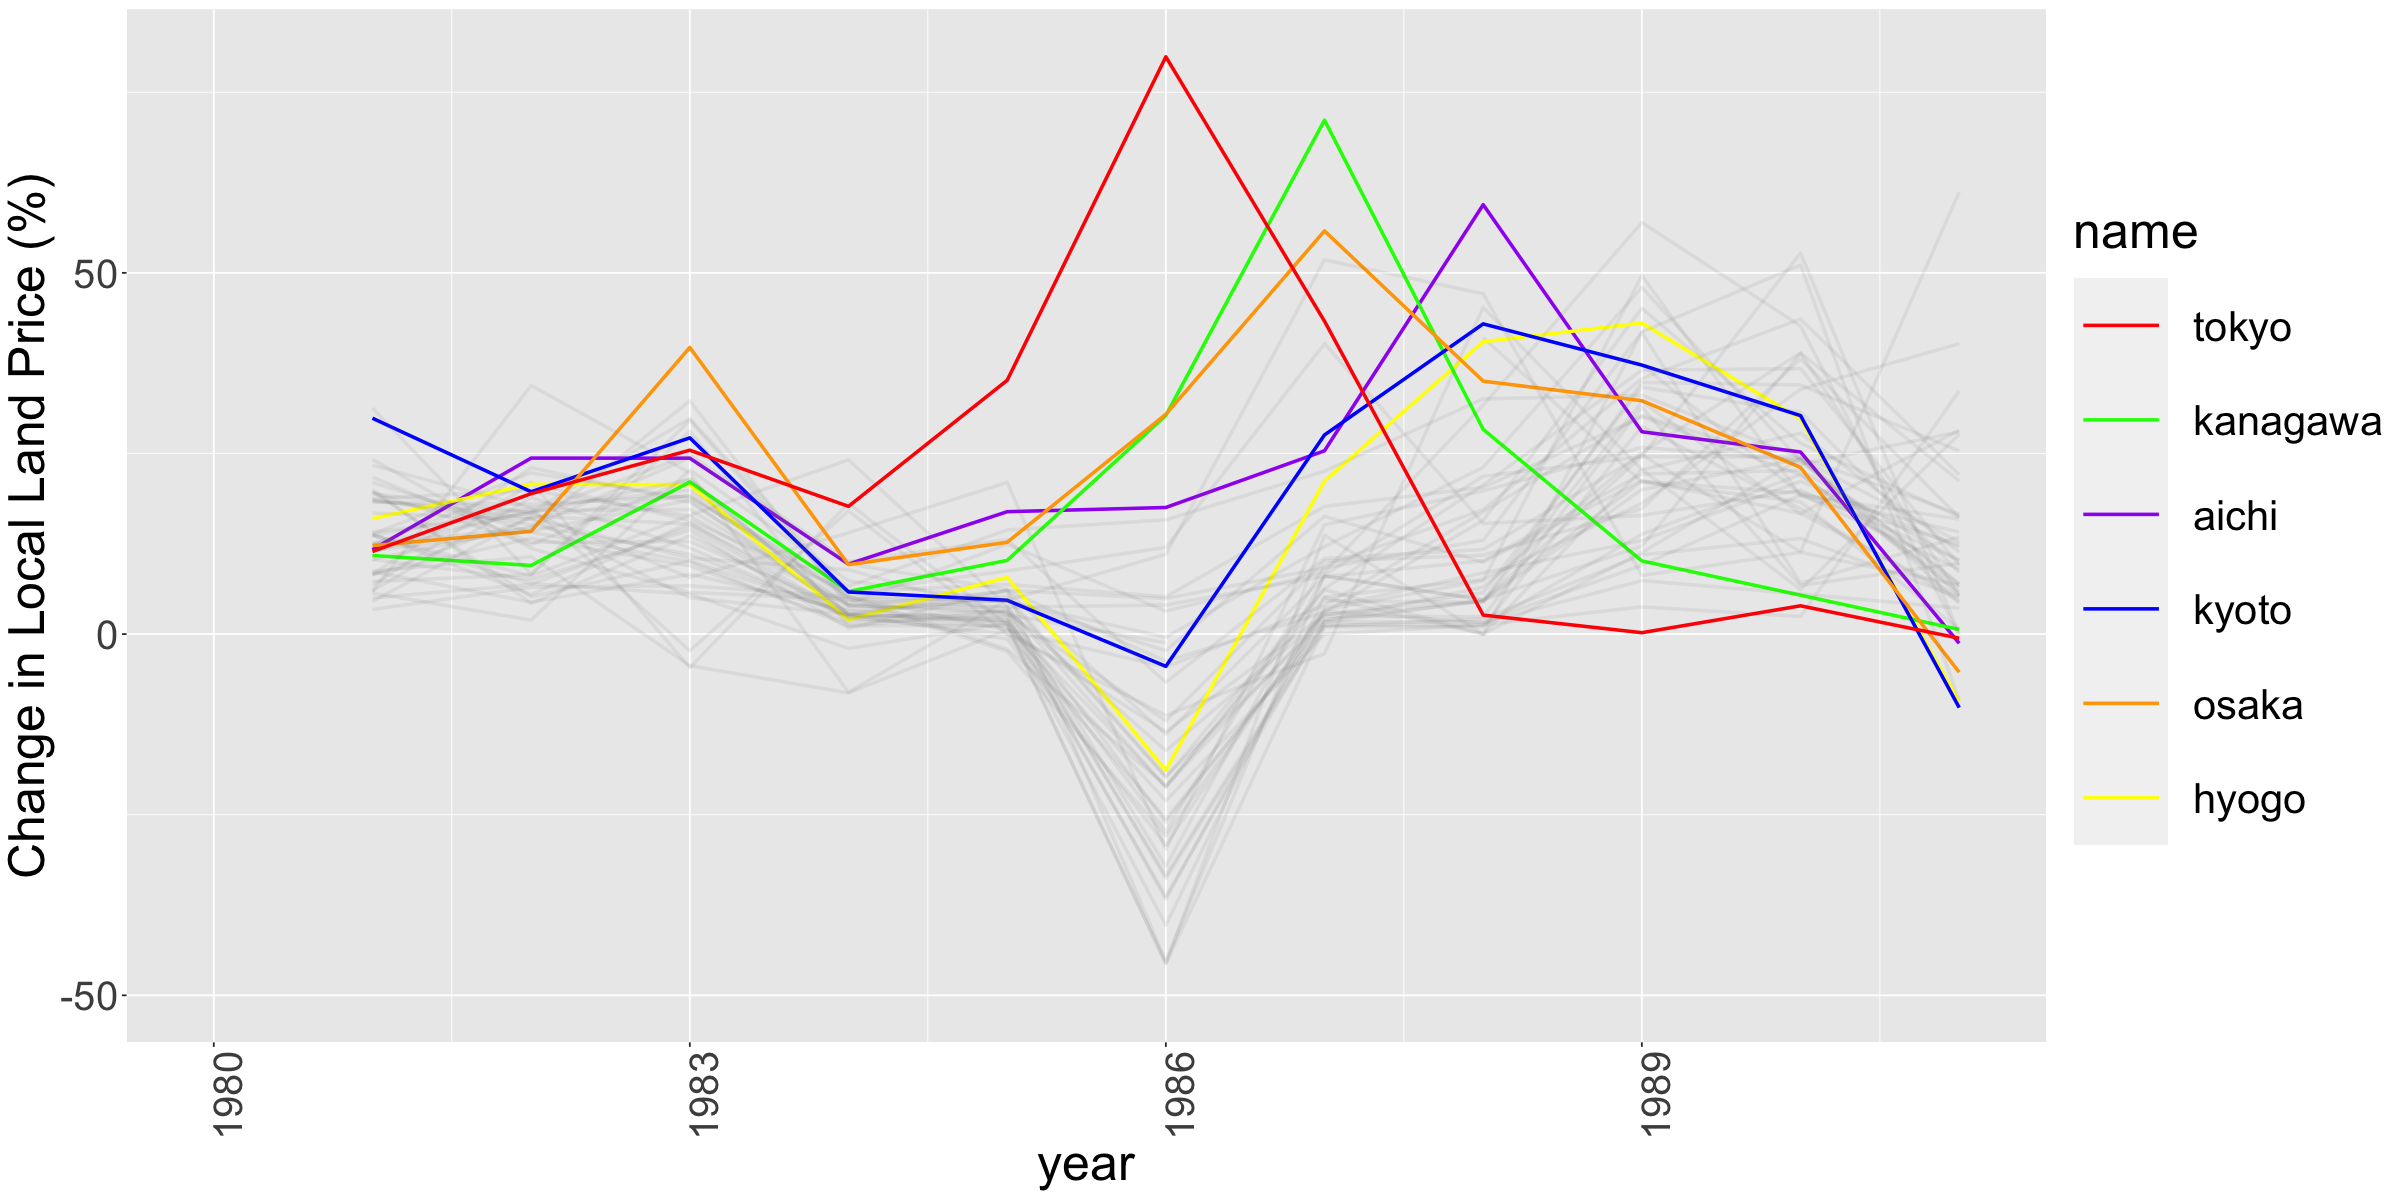

In [10]:
options(repr.plot.width=20, repr.plot.height=10)
ggplot(data = paper_data, aes(x = year, y = gland*100, color = name, alpha = name)) + 
  geom_line(aes(col = name), size = 1 ) + 
  ylim(-50, 80) +
  xlim(1980, 1991) +
  scale_color_manual(values = c("tokyo" = "red", "kanagawa" = "green","aichi" = "purple","kyoto" = "blue","osaka" = "orange","hyogo" = "yellow")) +
  scale_alpha_manual(values = c(1, 0.1, 0.1, 0.1, 0.1,  0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1, 0.1, 0.1, 0.1, 0.1, 0.1, 1, 0.1, 0.1, 1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1), breaks = NULL) + 
  theme(legend.key.size = unit(2, "cm")) + 
  theme(legend.text = element_text(size = 25)) + 
  theme(text = element_text(size=30),
        axis.text.x = element_text(angle=90, hjust=1)) +
  labs(y = "Change in Local Land Price (%)")

### Visual Extentsion 2 - Graph 2

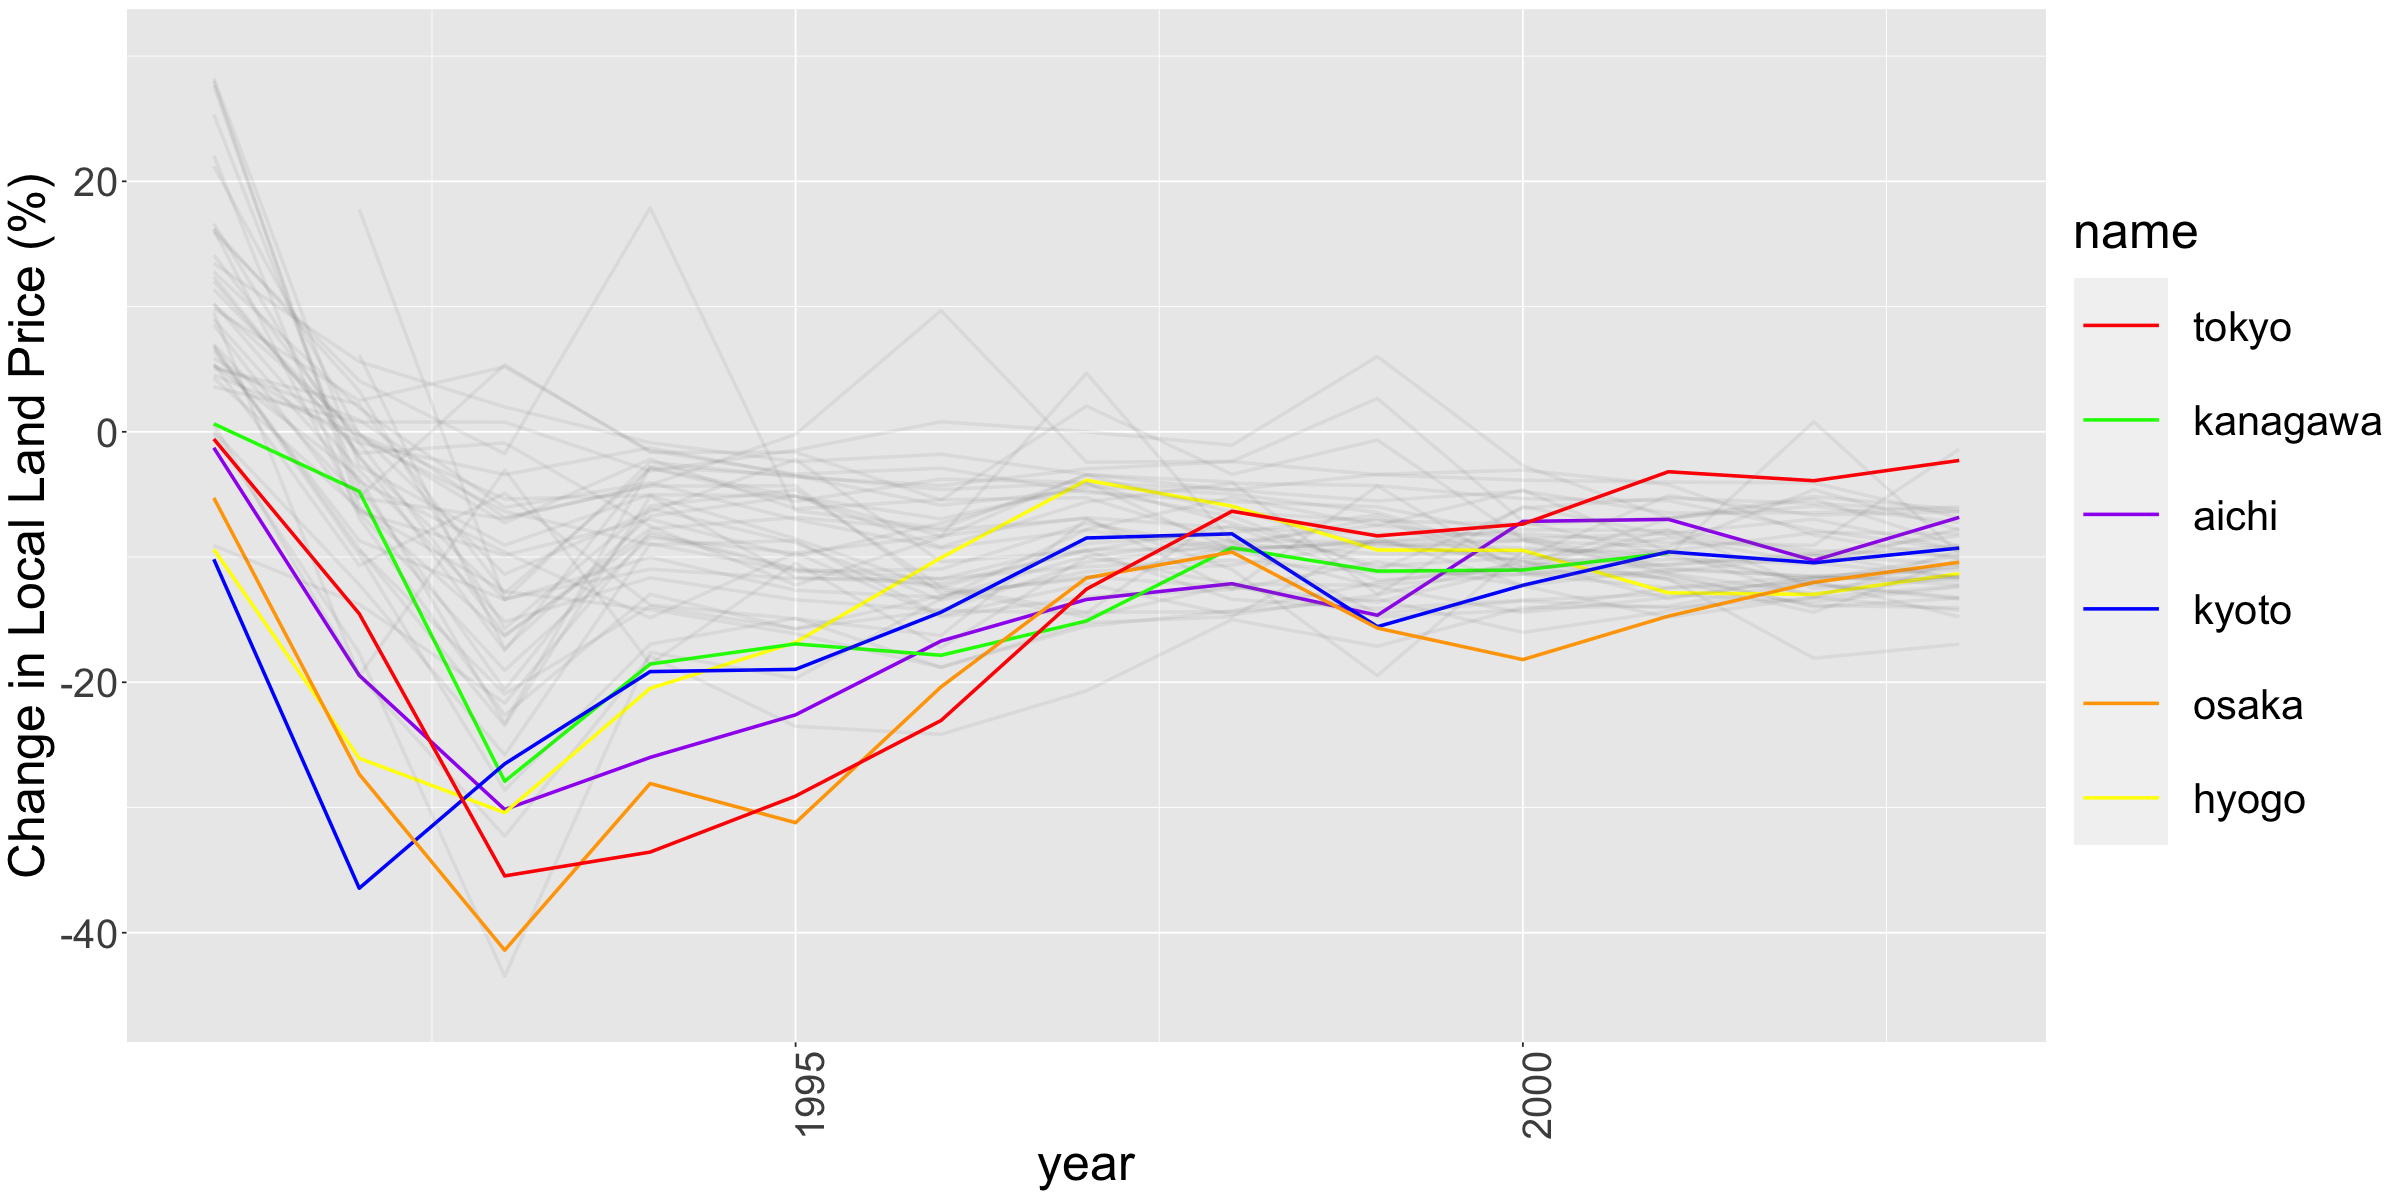

In [9]:
options(repr.plot.width=20, repr.plot.height=10)
ggplot(data = paper_data, aes(x = year, y = gland*100, color = name, alpha = name)) + 
  geom_line(aes(col = name), size = 1 ) + 
  ylim(-45, 30) +
  xlim(1991, 2003) +
  scale_color_manual(values = c("tokyo" = "red", "kanagawa" = "green","aichi" = "purple","kyoto" = "blue","osaka" = "orange","hyogo" = "yellow")) +
  scale_alpha_manual(values = c(1, 0.1, 0.1, 0.1, 0.1,  0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1, 0.1, 0.1, 0.1, 0.1, 0.1, 1, 0.1, 0.1, 1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1), breaks = NULL) + 
  theme(legend.key.size = unit(2, "cm")) + 
  theme(legend.text = element_text(size = 25)) + 
  theme(text = element_text(size=30),
        axis.text.x = element_text(angle=90, hjust=1)) +
  labs(y = "Change in Local Land Price (%)")


As the graph shows the land prices in financially integrated cities rose significantly more between 1980 and 1991. However, after the land price bubble collapse in late 1991 the decline of the land prices was again sharper in economically large cities compared to rural areas as can be seen in the graph 2.

From the observed volatility of the land prices in economically large cities, it is logical to assume that the transmission of the financial shocks has a geographical component to it. 



## 2.2.	Banking Integration 
 
For the banking integration measurement, the proportion of city bank branches in prefecture "i" to total branches of city banks and regional banks in prefecture "i" are used.
The graph below shows that the average city bank share in major cities where city banks mainly operate are significantly higher compared to the average city bank share in rural prefectures between 1980 – 2003. 



### Visaul Extension 3 - Graph 3 

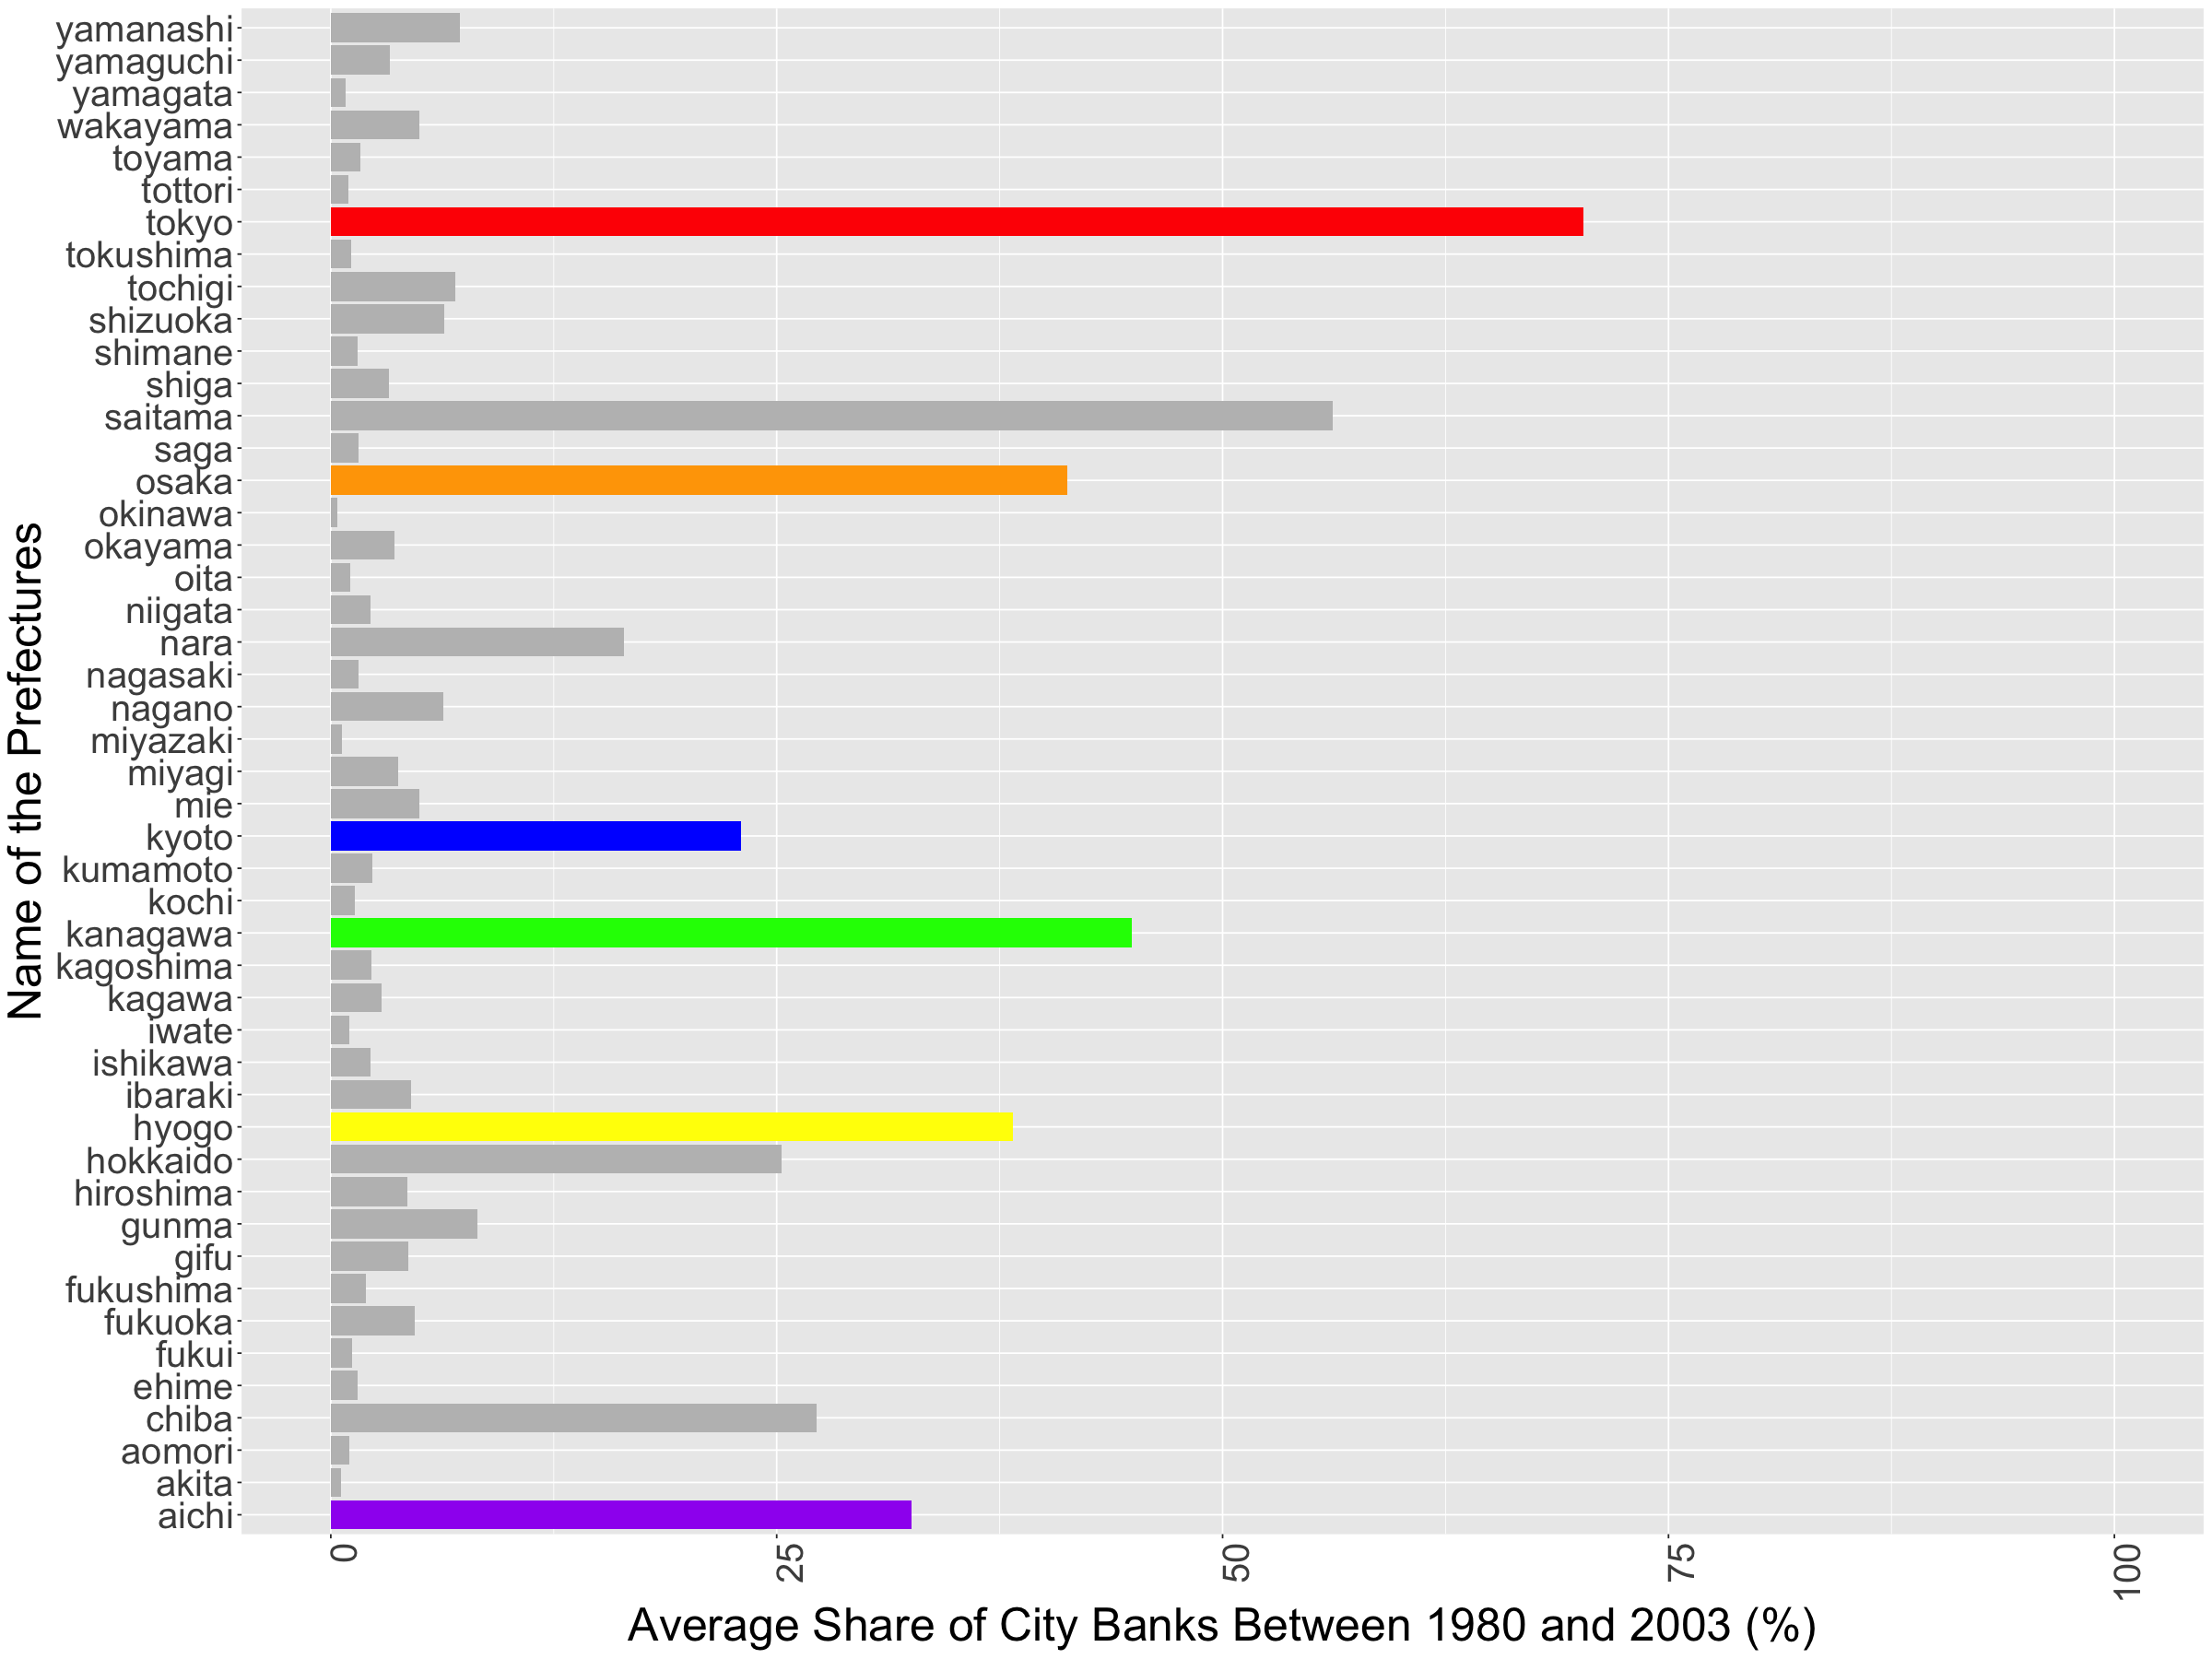

In [12]:
source("auxiliary/VisualExtension3.R")

## 2.3. Local Lending and Output 

The authors collect data from the Monthly Report of Recent Economic and Financial Developments and Annual Report of Prefectural Economy on loan and output at a prefecture level. 
The overview and the summary of the related variables are as follows. 


In [6]:
stargazer(as.data.frame(paper_data), omit =c("year", "prefid"), type = "text")


Statistic               N    Mean   St. Dev.  Min   Pctl(25) Pctl(75)  Max 
---------------------------------------------------------------------------
GDP                   1,128  0.033   0.036   -0.067  0.004    0.058   0.180
LOAN                  1,128  0.039   0.095   -0.427  -0.001   0.077   0.546
gloan_city2           1,123  0.005   0.017   -0.212 -0.0002   0.006   0.136
gland                 1,081  0.007   0.196   -2.393  -0.105   0.101   2.220
cityshare1            1,128  0.103   0.161   0.000   0.014    0.072   0.731
share_gland_city      1,081 0.0001   0.036   -0.202  -0.004   0.005   0.251
share0_gland_city     1,081 -0.001   0.036   -0.184  -0.007   0.005   0.231
dist_closestcity      1,128  0.234   0.241   0.000   0.051    0.369   1.187
dist_gland_city       1,081 -0.003   0.086   -0.374  -0.053   0.045   0.469
diff_gpc_gland_city   1,081 -0.018   0.223   -0.714  -0.165   0.087   0.805
citybank_diff_city    1,128  0.110   0.271   0.000   0.014    0.052   2.023
citybank_di


A dictionary on key variable names can be found on the appendix section. 


## 2.4.	Empirical Approach 

The authors deploy fixed effects regression method to investigate the empirical relationship between city land price shocks and loans which can be represented with the following equation. 



$∆Loan_{it} = {\alpha}_{i} + {\alpha}_{t} + {\alpha}_{1}∆LocalLandPrice_{it} 
+ {\alpha}_{2}CityBankShare_{it-1} x ∆City Land Price_{t} 
+ {\alpha}_{3}CityBankShare_{it-1} + {\epsilon}_{it} $


This method allows us to control the unobservable time-specific and prefecture-specific factors that influence the dependent variable. The dependent variable is Loan growth with subscript "i" being the prefecture index and "t" being the time index. 

The independent variable of interest is the $ CityBankShare_{it-1} x ∆City Land Price_{t} $ , which is an interaction for the lagged city bank shares in prefecture i and the land price change in the six major cities. The variable emphasizes the effect of the city land price shocks on local economies at time point "t".  As emphasized before if the land prices in economically integrated cities rises, large city banks might draw funds to balance the shortage caused by land price shocks. Therefore, with higher city bank shares of the prefectures the vulnerability of credit conditions to land price shocks might increase. In this regard a positive coefficient of this variable shows the possible harmful influence of the city bank presence.

The variable $∆LocalLandPrice_{it}$ is included as a control variable to ensure that the results are not driven by a connection between city land prices and local land prices. Furthermore, change in the local land price might affect the loan growth through the local bank financial conditions which is also controlled with the variable. To avoid an endogeneity problem authors exclude six major cities where the large city banks are located. (Hokkaido also was excluded since Hokkaido Takushoku Bank failed in the middle of the sample period 1997)

Lagged city bank shares are also included in the equation to account for the variances of the city bank shares within and across prefectures and for the possible influence on the loan growth. 

Lastly the ${\alpha}_{i}$ is the prefecture specific fixed effect that might influence the loan growth in prefecture "i", and the ${\alpha}_{t}$ is the year specific fixed effects.




However as stated in the first equation changes in loan supply might not have a real impact on local economies. To begin with, borrowers in local economies can barrow from non-bank lenders or have enough internal funds to balance the shortcomings of the decrease in loan supply. In these cases, change in loan supply that results from the change in city land prices, and therefore affect the financing conditions of city banks, should have less important effects. 

The real impact on local economies is measured by using a similar equation and only change the dependent variable from ∆Loan to ∆GDP which stands for the growth rate of the local economy. 


$∆GDP_{it} = {\alpha}_{i} + {\alpha}_{t} + {\alpha}_{1}∆LocalLandPrice_{it} 
+ {\alpha}_{2}CityBankShare_{it-1} x ∆City Land Price_{t} 
+ {\alpha}_{3}CityBankShare_{it-1} + {\epsilon}_{it} $

If the financial shocks have real impact on local economy one should observe, in a similar fashion, a positive ${\beta}_{2}$.
And lastly to estimate the causal effects of the change in the loan supply on real output authors deploy the instrumental variable method. 


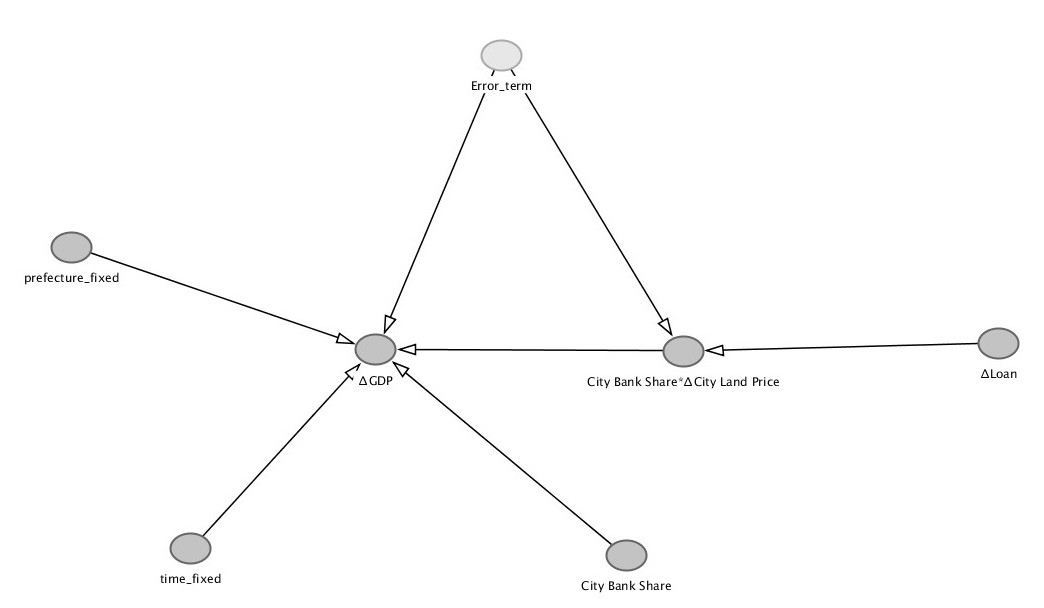

As seen in the graph the exogenous part of the ∆Loan is used which is driven by city land price shocks and the differential exposure of each prefecture to these shocks. The two equations below show the first and the second stage of the instrumental variable regression respectively. 
The ${\gamma}_{1}$ in the last equation can be interpreted as the elasticity of the real output to the change in the loan supply. 


$∆Loan_{it} = {\alpha}_{i} + {\alpha}_{t} + {\alpha}_{1}∆LocalLandPrice_{it} 
+ {\alpha}_{2}CityBankShare_{it-1} x ∆City Land Price_{t} 
+ {\alpha}_{3}CityBankShare_{it-1} + {\epsilon}_{it} $

$∆GDP_{it} = {\gamma}_{i} + {\gamma}_{t} +
+ {\gamma}_{1}\hat{∆Loan}_{it} 
+ {\gamma}_{2}∆LocalLandPrice_{it} 
+ {\gamma}_{3}CityBankShare_{it-1} + {v}_{it} $

# 3. Replication of the Results

In [33]:
source("auxiliary/table1.R")


Table 1 Part 1
                                                         Dependent variable:                      
                                   ---------------------------------------------------------------
                                     ∆GDP      ∆GDP      ∆GDP      ∆LOAN   ∆LOAN(IV-1) ∆LOAN(IV-1)
                                      (1)       (2)       (3)       (4)        (5)         (6)    
--------------------------------------------------------------------------------------------------
∆Local Land Price                  0.0222***           0.0146**  0.0781***              0.0598*** 
                                   (0.0065)            (0.0061)  (0.0167)               (0.0138)  
                                                                                                  
City Bank Share x ∆City Land Price           0.1347*** 0.1091***            0.3644**    0.2596**  
                                             (0.0384)  (0.0340)             (0.1432)    (0.11

1st Part of the Table 1 shows the fixed effect regressions with clustered standard errors. The clustered standard errors are used to account for possible within-prefecture correlation. 
2nd Part of the Table 1 shows the 2nd stage of the Instrumental Variable regression, where ∆Loan is used as an instrument for City Bank Share x ∆City Land Price. 

The results indicate that for loan growth equation in column 4 and 6 ∆Local Land Price is statistically significant which means that a significant portion in the loan supply change is caused by the fluctuations in the local land price and accordingly local collateral shocks. 

The variable of interest, City Bank Share x ∆City Land Price, is statistically significant and positive for the loan growth equations in column 5 and also in column 6 where the changes in local land prices are included. 
This can be interpreted as the following.
If a prefecture has small city bank presence the financial shock that is triggered by the change in the land price of the major cities won’t have a significant influence. However, if the opposite is the case, namely that a prefecture has a large city bank presence, then the city land price change will affect the local economy through the financial shock and the loan supply will be influenced. That supports the idea that the large city banks transmit the financial shock across geographical boundaries. 

A similar interpretation can be made for the GDP growth equations. 
∆Local Land Price is statistically significant in both 1st and 3rd columns. The key variable City Bank Share x ∆City Land Price is also statistically significant which shows that the city land price shocks transmitted by city banks have a real impact on local output.

Lastly in the 2nd part of table 1, the instrumental variable ∆Loan is statistically significant. The variable can be interpreted as the measured elasticity of output with respect to changes in loan supply which is in column 1 and 2 around 40% and therefore not just statistically but also economically important. 

The variables of interest, City Bank Share x ∆City Land Price in the 1st part of the table and ∆Loan in the 2nd part are also statistically significant and robust when controlled for the changes in the local land prices. Various robustness checks will be conducted in the 4th section to ensure that the estimations in this chapter are valid. 


# 4. Robustness Checks 

According to the authors there are three vital issues that might cause inconsistencies and errors when dealing with the underlying approach. These issues are addressed through different adjustments to the data and to the analyses. However, before conducting the three main robustness checks, that are mentioned in the paper, various diagnostic checks will be made to ensure, the used method is valid, and lastly as a critical assessment, incompareble properties of a single prefecture will be examined and the loan and gdp growth behavior of individual prefectures will be compared. The regression analysis will be adjusted accordingly. 


## 4.1. -Extentsion- Diagnostics of Panel Data and Estimation Method 

### 4.1.1. Diagnostics 1 - The Hausman Test 

As shown in the Chapter 2.4. the empirical approach is to use a twoways fixed effects model in which both time- and prefecture fixed effects are present. However in order to be sure that the application of fixed effects model is appropriate instead of random model effects, we can perform a Hausman-test where the null hypothesis is that the preferred model is random effects against the alternative Hypthoesis that the preferred model is the fixed effects.
In other words Hausman-test tests whether the unique errors ${\epsilon}_{it}$ are correlated with regressors.

In [9]:
reg_fe <- plm(GDP ~ gland + cityshare1 + share_gland_city,
                       data = paper_data_subset,
                       index = c("name", "year"),
                       model = "within",
                       effect  = "twoways")


reg_re <- plm(GDP ~ gland + cityshare1 + share_gland_city,
                       data = paper_data_subset,
                       index = c("name", "year"),
                       model = "random",
                       effect  = "twoways")

In [10]:
phtest(reg_fe, reg_re)


	Hausman Test

data:  GDP ~ gland + cityshare1 + share_gland_city
chisq = 33.98, df = 3, p-value = 2.001e-07
alternative hypothesis: one model is inconsistent


The p-value of 2.001e-07 indicates that the fixed effects model is the appropriate model to use.

### 4.1.2. Diagnostics  2 - Testing for cross-sectional dependence/contemporaneous correlation

Furthermore Pesaran et.al. (2010) assume that cross-sectionaly correlated error terms are often present in panel data and might invalidate the results of the interference. Therefore it is important to make sure that in a balanced panel errors across sections are independent. In other words these two tests are conducted to show that the residuals across entities are not correlated. If that would be the case we could theoretically face a bias problem.

In [15]:
pcdtest(reg_fe, data  = paper_data_subset, 
        test = c("lm"))


pcdtest(reg_fe, data  = paper_data_subset, 
        test = c("cd"))



	Breusch-Pagan LM test for cross-sectional dependence in panels

data:  GDP ~ gland + cityshare1 + share_gland_city
chisq = 1194.1, df = 780, p-value < 2.2e-16
alternative hypothesis: cross-sectional dependence



	Pesaran CD test for cross-sectional dependence in panels

data:  GDP ~ gland + cityshare1 + share_gland_city
z = -2.909, p-value = 0.003626
alternative hypothesis: cross-sectional dependence


Both p-values indicate that the cross sectional dependence of the residiuals across entities (in this case prefectures) does not depict an estimation problem. 

### 4.1.3. Diagnostics 3 - Testing for Autocorrelation 

In a similiar fashion serial correlation i.e. autocorrelation of the error term might lead to inconsistent estimates. The fixed effect regression assumes that the error term ${\epsilon}_{it}$ is i.i.d. across time intervals. Only under this assumption we can work with the heteroskedascity-robust standard errors. Therefore it is also important to check whether an autocorrelation is present. This can be checked via Breusch-Godfrey/Wooldridge test and Wooldridge Test for AR(1) Errors in FE Panel Models.

In [19]:
pbgtest(reg_fe)
pwartest(reg_fe)


	Breusch-Godfrey/Wooldridge test for serial correlation in panel models

data:  GDP ~ gland + cityshare1 + share_gland_city
chisq = 72.173, df = 23, p-value = 5.591e-07
alternative hypothesis: serial correlation in idiosyncratic errors



	Wooldridge's test for serial correlation in FE panels

data:  reg_fe
F = 4.4801, df1 = 1, df2 = 878, p-value = 0.03457
alternative hypothesis: serial correlation


Looking at the both p-values we can conclude that there is no autocorrelation present.



## 4.2.	Measurement of Financial Shocks. 

The main problem of the Japan’s land price index the fact that it’s based on appraised values and not on direct transactional values.
The price index is created by looking at the transactions of comparable properties which is not always necessarily comparable. Because of that the price index might deviate from the real price. Combined with the fact that in local prefectures, real estate market is not as liquid as in the cities, unmeasured terms might be captured by the error term which could be defined as the unmeasured connection between city land price index and local price innovation. If that is case, we would have an invalid estimate. 
Furthermore, when calculating the price of the land, appraisers also take the past transactions into account. The land prices might consequently lag behind the price innovation which might again lead to inconsistent estimations. 

The most ideal way to overcome this problem would be to collect transaction-based data, however this is impossible to achieve because of the simple fact that Japan does not publish such data. Nevertheless, to address this problem authors use a low frequency data. In this transformed data set data is presented in two-, three- and four-year frequencies.
By keeping the time gaps longer, the error in ∆Local Land Price is reduced. The reason for is that as time gap becomes larger, more information on the true extent of the land prices is captured. For example, the ∆Local Land Price might understate the impact of price change in a particular year, say 1992, but between two long time periods, say 4 year, the explanatory power will increase as it will capture the extent of the price decline more consistently and therefore reduce the error of the variable. 
And following that it is assumed if the results are driven by the measurement error, and more control variable becomes more explanatory, the key variable City Bank Share x ∆City Land Price and the instrumental variable ∆Loan should be notably less significant and overall weaker. 

In [4]:
source("auxiliary/table2.R")


Table 2 Part 1.1 Two-year frequency
                                              Dependent variable:           
                                   -----------------------------------------
                                     ∆GDP      ∆GDP      ∆LOAN   ∆LOAN(IV-1)
                                      (1)       (2)       (3)        (4)    
----------------------------------------------------------------------------
∆Local Land Price                  0.0399*** 0.0309*** 0.1199***  0.0962*** 
                                   (0.0084)  (0.0088)  (0.0203)   (0.0180)  
                                                                            
City Bank Share x ∆City Land Price           0.0950***            0.2599*** 
                                             (0.0311)             (0.0974)  
                                                                            
City Bank Share                              0.4707**             0.8695**  
                                       

Looking at the results we can observe 3 patterns. 
1.	As suggested, the control variable ∆Local Land Price has a larger coefficient, and the larger the time gap gets the larger the coefficient becomes, meaning that the measurement errors are reduced, that resulted from the fact that price index on local land is based on appraised values. In other words with a larger time gap more information on land prices can be collected and therefore the change in the local land price can be explained more accurately. That the ∆Local Land Price has a larger coefficient and therefore more explanatory power in a larger timespan can also be seen in the graph below. The graph shows the change in local land prices in two, three and four year intervals for each country. (For visualisation purposes change in the local land prices in 2 and 3 year frequencies are selected and put into the mutated 4 year frequency data.) 

## Visaul Extension 4 - Graph 4 

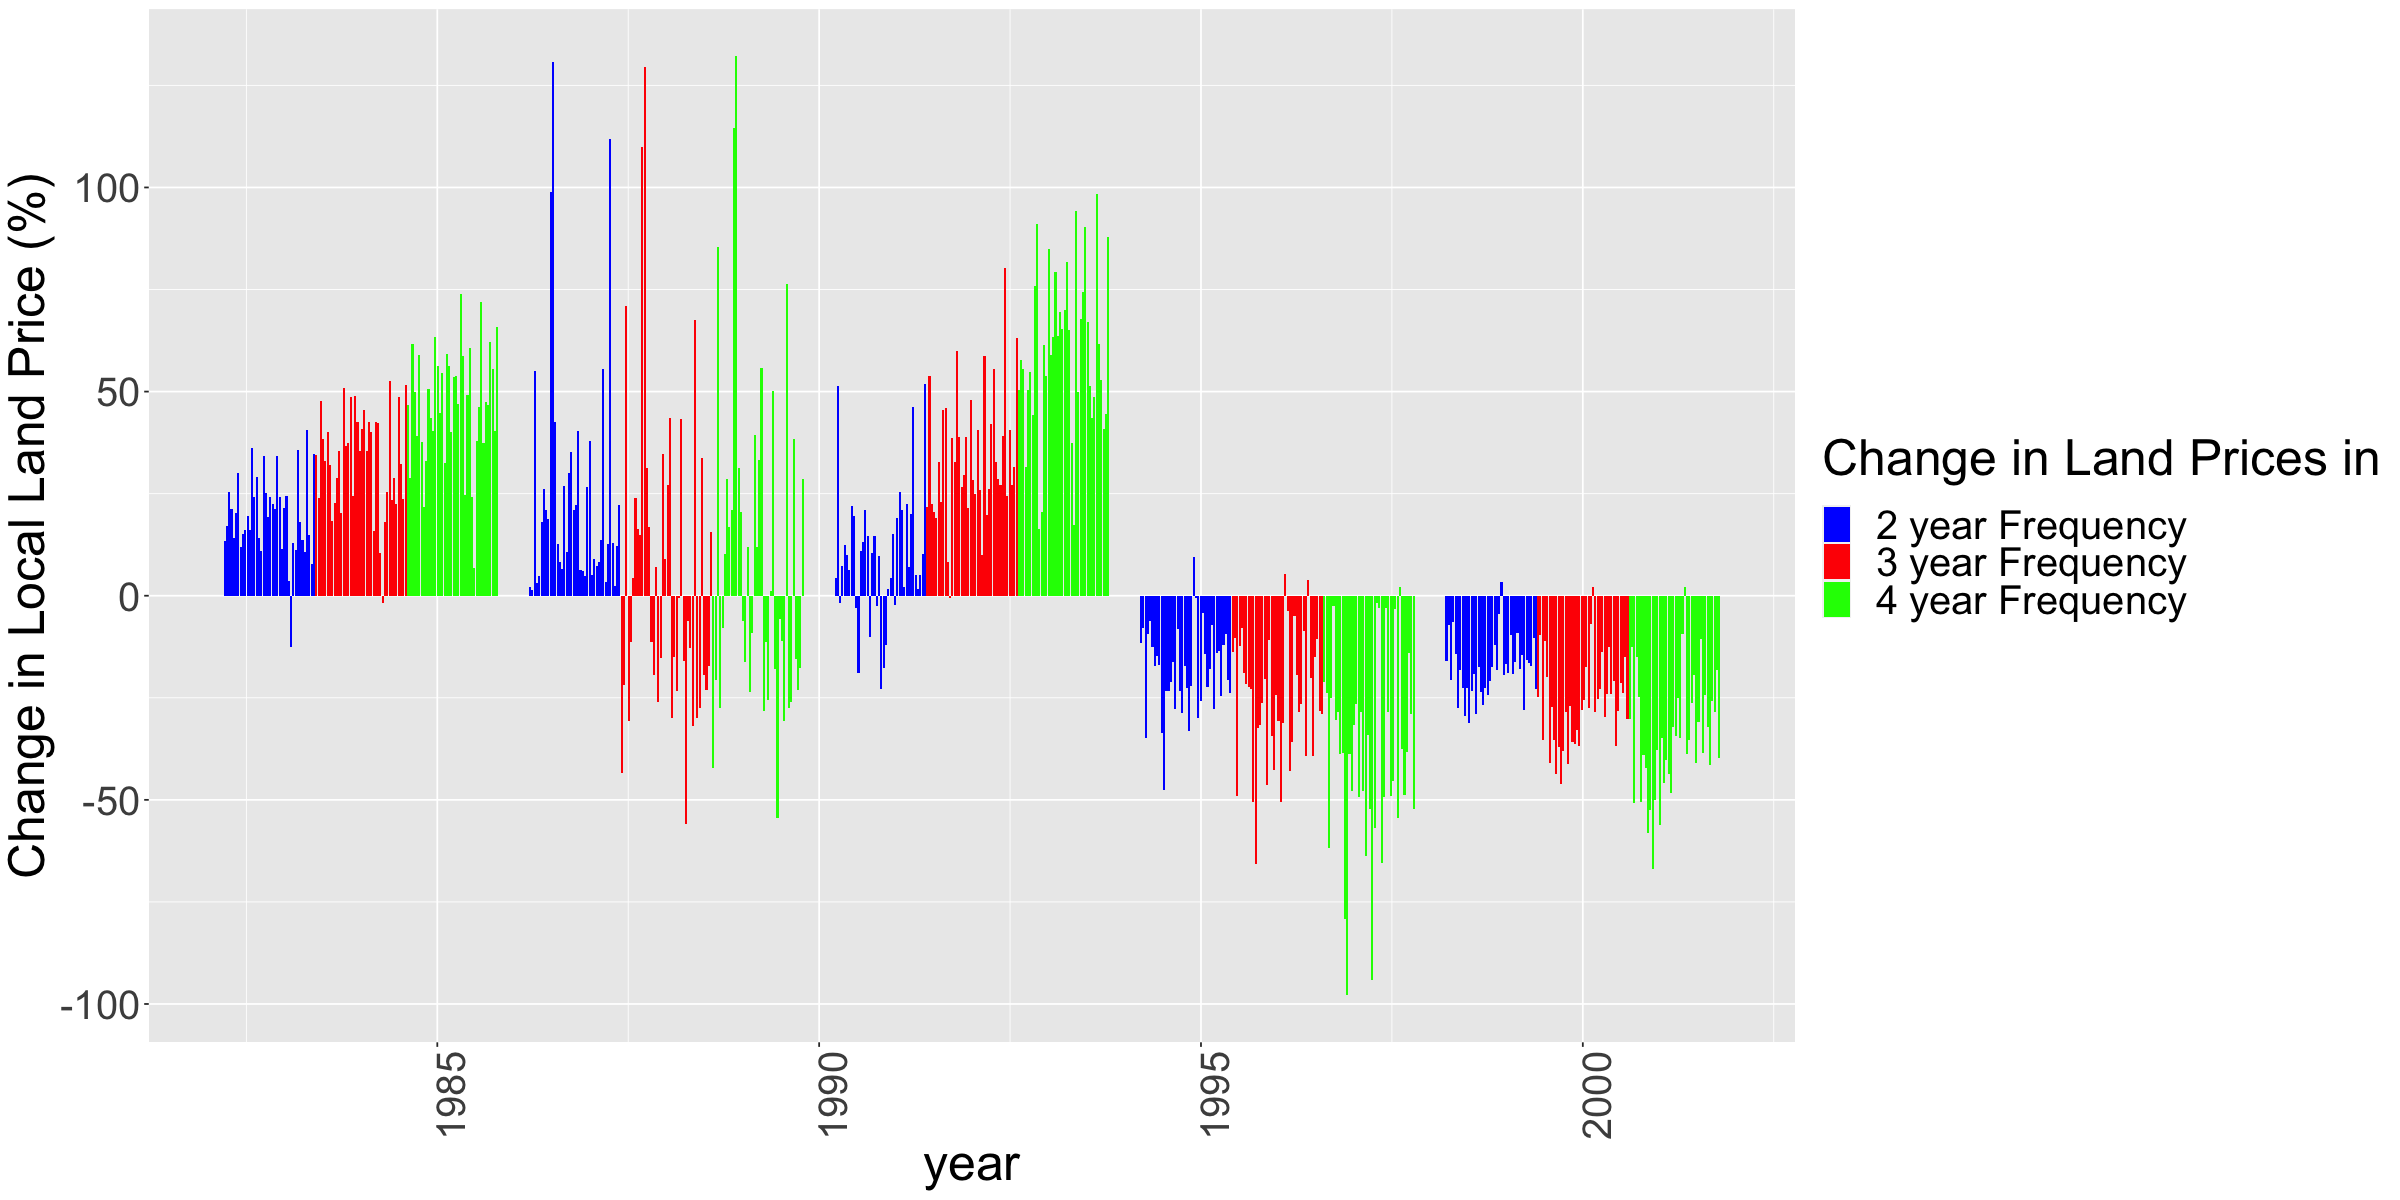

In [49]:
source("auxiliary/VisualExtension4.R")

2.	The standard error of nearly all coefficients becomes larger, the reason simply being that the sample sized is drastically reduced. 
3.	The key variable City Bank Share x ∆City Land Price and the instrumental variable ∆Loan remains highly significant in ∆GDP -, first stage ∆Loan and second stage ∆GDP equations. 
Based on these patterns it can be concluded that although measurement errors are present, the main results are not driven by them.

## 4.3. Endogeneity of City Bank Branch Share 

Another potential criticism is that City Bank Share might be endogenous as it might change with the local economic conditions. To tackle this issue authors use the city bank branch share from the year 1979 as a constant for all time periods. 
The disadvantage of this approach is that the presence of city banks in local economies might not be captured to the full extent. 
However, the advantage of using a constant is, it can be ensured that there is not an endogeneity problem regarding the variable of interest “City Bank Share x ∆City Land Price” and the Instrumental Variable ∆Loan. 

In [10]:
source("auxiliary/table3.R")


Table 3 Part 1 Results based on City Bank Share as of 1979
                                              Dependent variable:     
                                          ----------------------------
                                               ∆GDP       ∆LOAN(IV-1) 
                                               (1)            (2)     
----------------------------------------------------------------------
∆Local Land Price                            0.0132**      0.0560***  
                                             (0.0061)      (0.0131)   
                                                                      
City Bank Share x ∆City Land Price (1979)   0.1430***      0.3527**   
                                             (0.0341)      (0.1370)   
                                                                      
----------------------------------------------------------------------
Observations                                   920            920     
R2               


The results show that when City Bank Share is kept constant both our key variable City Bank Share x ∆City Land Price and the instrumental variable ∆Loan remains statistically significant and robust. 


## 4.4. Unmeasured Correlation between Cities and Local Economies

The last criticism is that the economic and credit cycles of financially integrated prefectures are correlated with land prices, not only through the financial shocks but also through non-financial link such as trade. A financially integrated prefecture might be exposed to the same non-financial shock that affects major cities. Therefore, there might be an unmodeled connection between cities and prefectures, that affects the key variable. 
Furthermore, this unmodeled connection might affect the city bank share in local prefectures, as city banks might have non-financial and local-conditions related motives to open branches in some prefectures. Therefore, these motives might be correlated with how prefectures react to economic shocks in cities which might lead to a potential endogeneity problem. 
In order to address this, authors use 3 distinct methods. 


### 4.4.1. Non-City Banks versus City Banks 

If the key variable is driven by a non-financial shock that affects both local conditions and city land prices, it can be observed that both local bank lending and city bank lending respond positively to a change in city land prices. The reason for that is that a change in city land prices will be accompanied by a change in local conditions which is resulted by a non-financial shock.

To implement this idea the loan growth is divided into two parts, namely change in the total lending of non-city banks and change in the lending of city banks.


\begin{equation*}
∆LOAN_{it} = \frac{LOAN_{it} - LOAN_{it-1}}{LOAN_{it-1}} 
\end{equation*}

\begin{equation*}
= \frac{({LOAN(Non-City)_{it} - LOAN(City)_{it}}) - (LOAN(Non-City)_{it-1} - LOAN(City)_{it-1})}{LOAN_{it-1}} 
\end{equation*}

\begin{equation*}
= \frac{LOAN(Non-City)_{it} - LOAN(Non-City)_{it-1}}{LOAN_{it-1}} + \frac{LOAN(City)_{it} - LOAN(City)_{it-1}}{LOAN_{it-1}}
\end{equation*}

\begin{equation*}
= ∆LOAN(Non-City)_{it} + ∆LOAN(City)_{it}
\end{equation*}

These two components are used as a dependent variable in the fixed effects regression. If indeed the results are driven by a coincidental non-financial shock that affects both local conditions and city land prices, the key variable City Bank Share x ∆City Land Price should be statistically and quantitively significant to both dependent variables. However, if financial shocks are correctly identified and the former assumptions are true, only city bank lending should respond positively to the city land price fluctuations. 

In [7]:
source("auxiliary/table4.R")


Table 4 Part 1 Placebo Test on Non-City Lending
                                                     Dependent variable:                  
                                   -------------------------------------------------------
                                   ∆LOAN(Non-City) ∆LOAN(Non-City) ∆LOAN(city) ∆LOAN(city)
                                         (1)             (2)           (3)         (4)    
------------------------------------------------------------------------------------------
∆Local Land Price                     0.0766***       0.0669***     0.0148***    0.0006   
                                      (0.0162)        (0.0159)      (0.0052)    (0.0028)  
                                                                                          
City Bank Share x ∆City Land Price                     0.1222                   0.2229*** 
                                                      (0.1058)                  (0.0268)  
                                         

As can be seen in table 4 the key variable is only statistically significant when the dependent variable is ∆Loan (city bank), which suggests that only city bank lending is sensitive to a change in city land prices. Furthermore it can be observed that the changes in local land prices are much more important for the non-city banks and their loan supply compared to the city banks, indicating that the financial health of local barrowers is of utmost importance for non-city banks. 
Therefore, it can concluded that the results indeed pass the placebo test. 

### 4.4.2. Differential Sensitivity of Local Economies to City Shocks

To further investigate the unmodeled connection between cities and local economies authors use horse race regression in which other observable factors are regressed in addition to the existing ones. One of the main observable factors that might influence the change in GDP or bank lending is “distance”. 

Geographical proximity of the prefectures to the cities might be correlated how city bank branches are distributed. Therefore, the distance of each prefecture to the six major cities are calculated and the average distance is computed. The variable “Distance” is then interacted with City Bank Share and ∆City Land Price. 
The income difference might also be an unmodeled correlation between cities and local economies, as banks tend to have more branches in wealthier prefectures. In a similar fashion, a control variable for income difference is computed by taking the difference of income per capita between cities and prefectures. This control variable is then again interacted with City Bank Share and ∆City Land Price. 

The last control variable that is included in the horse race regression is “Industry mix control”. Authors assume if some prefectures and cities are concentrated on certain industries, city banks may have greater penetration in non-city prefectures and therefore both cities and prefectures might be exposed to the same industry-wide shocks that can affect economic and credit cycles. The control variable is constructed firstly by calculating the growth of each industry in city prefectures denoted by $η_{jt}$ where "j" stands for industry and "t" for year. Then the weighted sum of the industry level output growth is calculated where the weights are given by the share of each industry in non-city prefectures. The calculated index is the following: 

 $η_{it} = γ_{ijt−1}η_{jt}$, where $η_{it}$ stands for the predicted output growth of prefecture "i" in year "t". The calculated index which is used as a control variable represents the intensity of local industry shocks.

In [11]:
source("auxiliary/table5.R")


Table 5 Part 1 - Controlling For Differential Correlation Between Local Economies and Cities
                                                             Dependent variable:                          
                                   -----------------------------------------------------------------------
                                   (Reduced-form)∆GDP (IV-2)∆GDP (IV-1)∆Loan (Reduced-form)∆GDP (IV-2)∆GDP
                                          (1)            (2)         (3)            (4)            (5)    
----------------------------------------------------------------------------------------------------------
City Bank Share x ∆City Land Price     0.0940***                  0.4185***      0.0829***                
                                        (0.0295)                  (0.1455)        (0.0311)                
                                                                                                          
∆Loan                                             

As can be seen in the table 5, the interaction of income difference and change in the city land prices are statistically significant in all columns, indicating that the loan and output growth of prefectures and cities that are similar in income exhibit a strong correlation to city land price changes. 

In a similar fashion the industry mix control $η_{it}$ is statistically significant which means that the prefectures that are concentrated on similar industries as the major cities seem to be more responsive to an industry wide shock. 

Subsequently it can be assumed that these control variables capture the unmodeled connection between cities and prefectures, however the main results and hence the main takeaway stay the same. Both City bank share x ∆City Land Price and the instrumental variable ∆Loan are positive and statistically significant. The only difference that can be observed is the intensity of the key variables. 

After controlling for income differences elasticity of output to loan supply (∆Loan in column 2) is reduced to 0.23 from 0.42 in table 1. City bank share x ∆City Land Price however, increased from 0.26 to 0.42 after the income difference control is added. 

These changes indicate that the unmodeled correlated shocks might be a contributing factor when dealing with the economic and credit cycles. 

### 4.4.3. Subsample Results 

The last robustness check in the paper is to only use those prefectures that are far away from cities and those that are different in terms of income per capita. Authors assume the prefectures that are similar in those two terms might be not independent and contain further unmodeled dependencies. By using only prefectures that are different in those two terms, it can be ensured that the results are robust. 

To achieve that, three subsamples are created in which prefectures that are in average 50km, 100km and 150km away are selected. In a similar manner, prefectures that differ from cities in terms of income per capita by 0.6 million, 0.8 million and 1 million yens are selected. 

In [11]:
source("auxiliary/table6.R")


Table 6 Dist > 50km
                                       Dependent variable:     
                                   ----------------------------
                                        ∆GDP       ∆LOAN(IV-1) 
                                        (1)            (2)     
---------------------------------------------------------------
City Bank Share x ∆City Land Price    0.3171**      1.8913***  
                                      (0.1606)      (0.3571)   
                                                               
∆Local Land Price                      0.0116       0.0355***  
                                      (0.0074)      (0.0120)   
                                                               
City Bank Share                        0.2464        0.1699    
                                      (0.1627)      (0.1945)   
                                                               
---------------------------------------------------------------
Observations       

The results show that both City Bank Share x ∆City Land Price and the instrumental variable ∆Loan are statistically significant and therefore robust in subsample regressions.

## 4.5. -Extension- Systematic Hindrance of Okinawa's Economic Develepoment

To prevent a possible endogenity problem authors remove 6 major cities from the ∆Local Land Price as they are included in ∆City Land Price. Also removed from the analysis is the data on Hokkaido. The reason being the Hokkaido Takaushoku city bank failed in 1997 and the bank having a large presence in the prefecture rendered it incomparable to the other local economies. 

Followingly, it should be considered that the prefecture "Okinawa" has also incomparable properties to other local economies. According to Pajon (2010) presence of U.S. bases and its constant activity, hindered the economic development of the prefecture. Despite the generous national funds, the prefecture remained and remains to this day, in a systematic manner, historically poor. Therefore, it can be speculated that, there exists an unmodeled connection between the economic activity and it's reactions to the shocks.

## Visual Extension 5 - Graph 5 

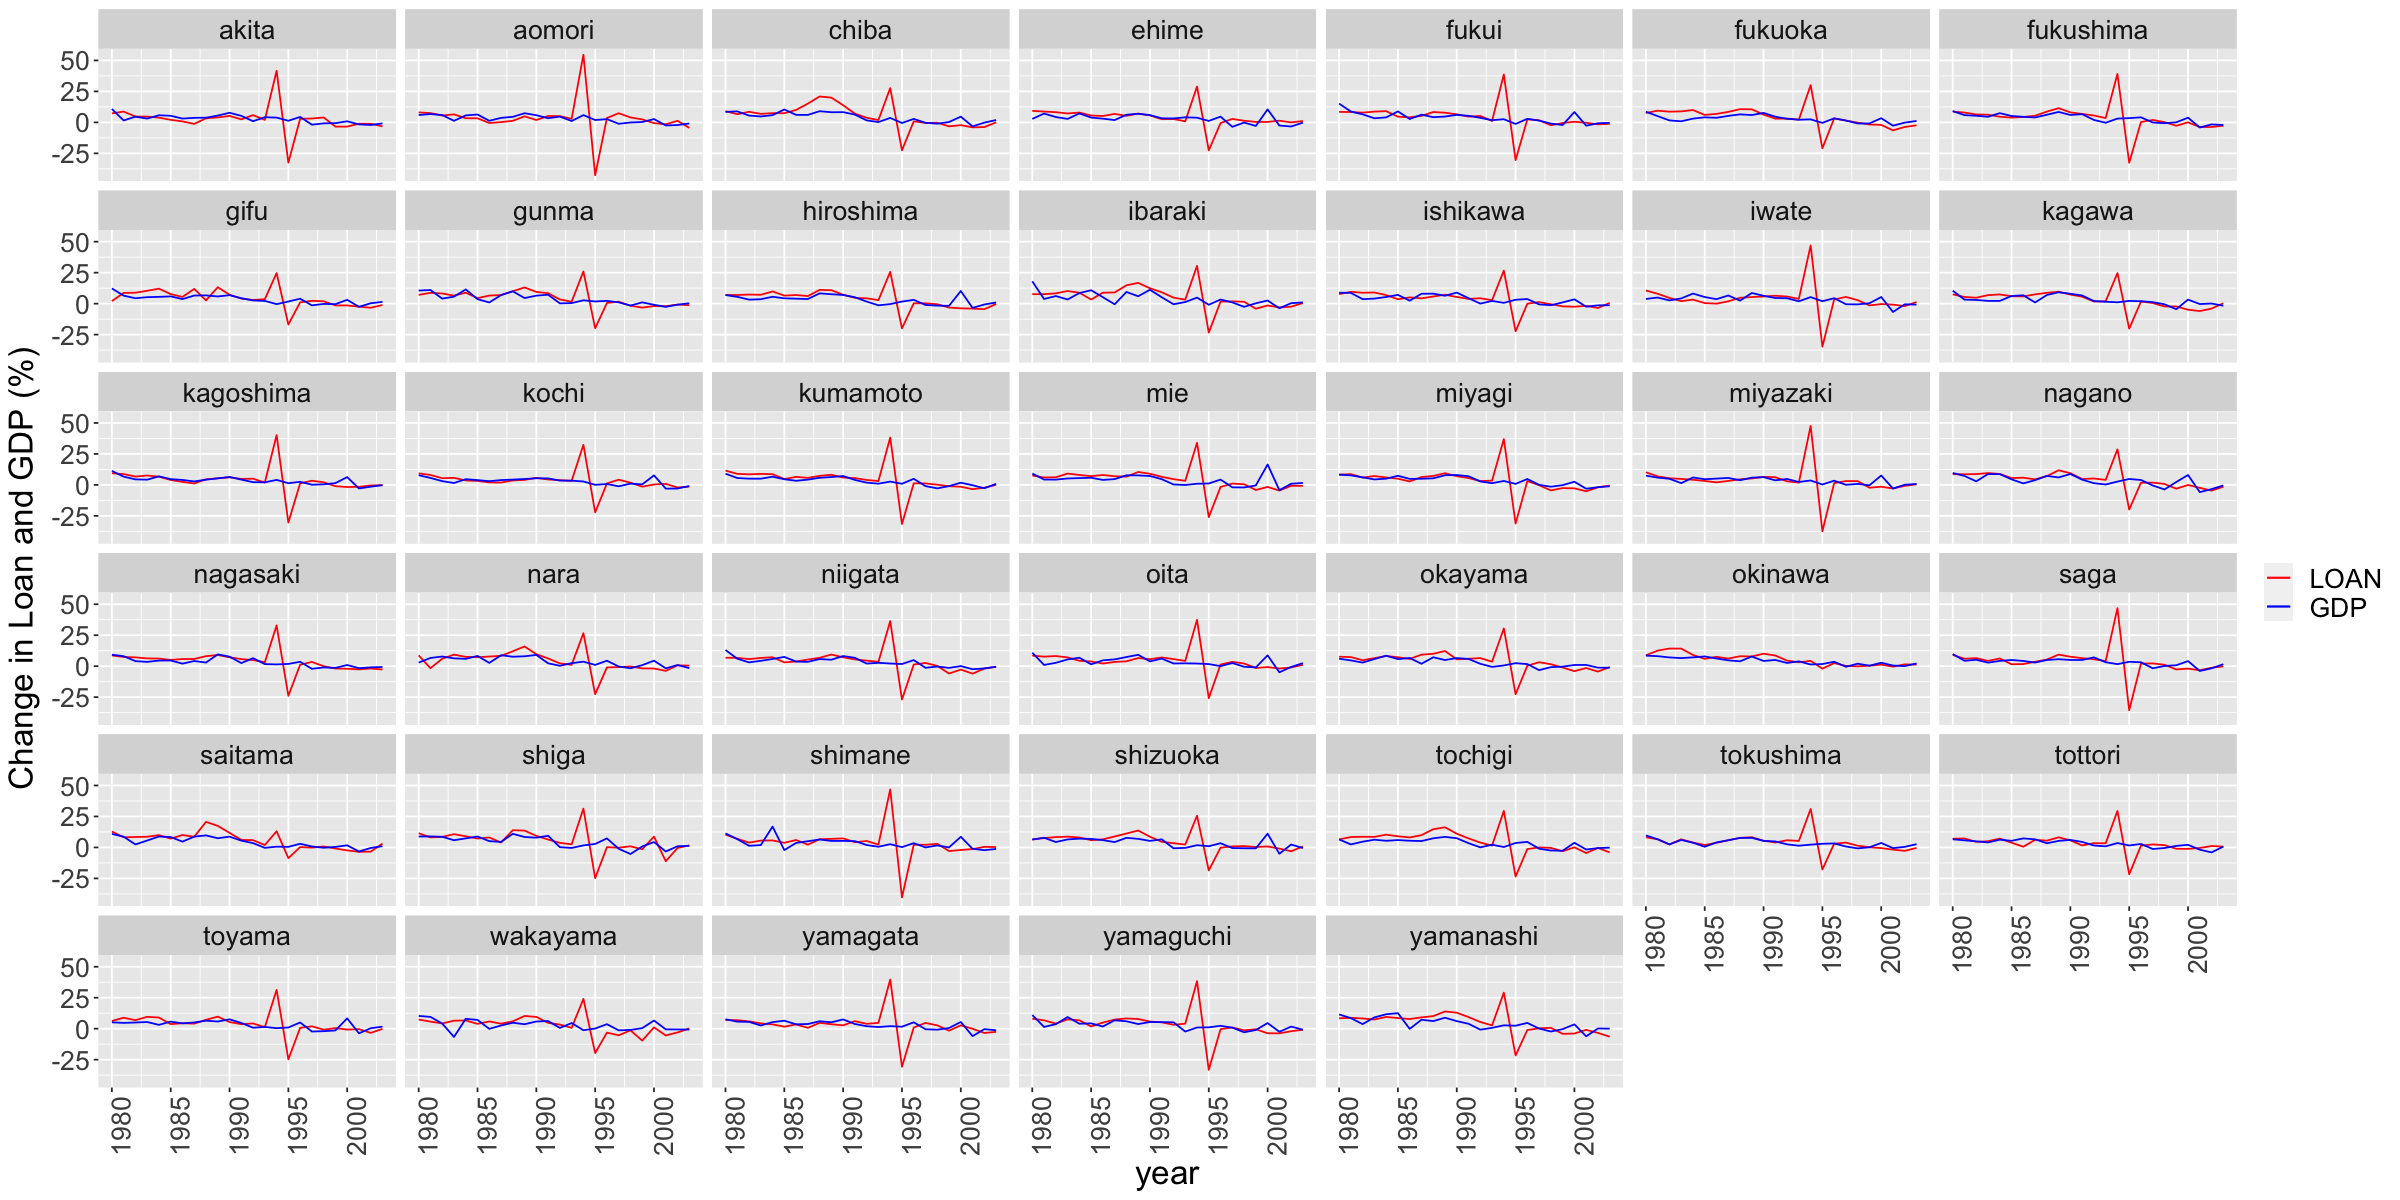

In [50]:
source("auxiliary/VisualExtension5.R")

In the graph above the GDP and the Loan supply growth is depicted. Okinawa, as argued, displays a rather unusual pattern, hinting at the possibility of an unmodeled connection, which might alter the results, if not controlled for. 
In order to determine the results more accurately, the main regression in the section 3 will be conducted, this time however by exluding Okinawa. 

In [31]:
source("auxiliary/table_extension.R")


Main Regression w/o Okinawa Part 1
                                                         Dependent variable:                      
                                   ---------------------------------------------------------------
                                     ∆GDP      ∆GDP      ∆GDP      ∆LOAN   ∆LOAN(IV-1) ∆LOAN(IV-1)
                                      (1)       (2)       (3)       (4)        (5)         (6)    
--------------------------------------------------------------------------------------------------
∆Local Land Price                  0.0222***           0.0143**  0.0806***              0.0613*** 
                                   (0.0068)            (0.0064)  (0.0170)               (0.0143)  
                                                                                                  
City Bank Share x ∆City Land Price           0.1306*** 0.1054***            0.3607**    0.2528**  
                                             (0.0381)  (0.0340)          

The tables above show that after excluding Okinawa, key variables are still statistically significant. We can note however, a slight reduction in City Bank Share x ∆City Land Price and ∆LOAN, indicating that city banks transmitting the financial shock less than the main findings in chapter 3 and a lower elasticity of local output to loan supply.

We also observe a slight increase in both R^2 and adjusted R^2 indicating that the adjusted regression has a better explanatory power.

However it should be also noted that aforementioned changes might be due to the decreasing sample size, as the clustered standard errors become slightly larger with exception of the key variable City Bank Share x ∆City Land Price in column 2 and 3. 

# 5. Conclusion 

A wide variety of macroeconomic literature assumes that diversified large banks are advantageous in overcoming the burdens of a financial crisis. They can withstand shocks from individual markets as they have access to many of them. 
In this paper however, authors argue that a poor risk management of banks can lead to some cuts in loan supply which can intensify the effects of a financial shock and increase volatility of prices during an economic crisis. Looking at the data between 1980 and 2003 it can concluded that as a consequence of land price bubble collapse in major cities, large, diversified city banks transmitted financial shocks from those cities to local economies. If a prefecture has a large share of nationwide city banks i.e., if the prefecture is financially well integrated, effects of economic downturn will increase proportionally as a result of city banks cutting back loans from local economies. Furthermore, as the analysis suggests, the shifts in the loan supply has drastic effects on local output with the elasticity of local output to loan supply being around 20-40 percent in Japan. 

However, it should be emphasized that these results might vary notably from country to country, as Japan is highly dependent on land prices because using land as collateral is exceptionally common. It is also argued that Japanese government together with the large, diversified banks managed risk poorly during the economic downturn. 
This paper therefore only hints on the possible danger of large, diversified banks transmitting the financial shocks to the local economies and thereby increasing the effects of the economic downturn. 

# 6. References 

- G. Kapetanios, M. Hashem Pesaran, T. Yamagata. Panels with nonstationary multifactor error structures. Econometrics, MDPI, 2010, 160 (2), pp.326


- Imai, Masami, and Seitaro Takarabe. 2011. "Bank Integration and Transmission of Financial Shocks: Evidence from Japan." American Economic Journal: Macroeconomics, 3 (1): 155-83.


- Torres-Reyna, Oscar, 2010, Getting Started in Fixed/Random Effects Models using R, lecture notes, Princeton University, delivered Fall 2010


- Pajon, Céline. 2010, "Understanding the Issue of U.S. Military Bases in Okinawa", IFRI Center for Asian Studies 


- Peek, Joe, and Eric S. Rosengren. 2000. “Collateral Damage: Effects of the Japanese Bank Crisis on Real Activity in the United States.” American Economic review, 90(1): 30–45.

# 7. Dictionary of Key Variables 

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;margin:0px auto;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-8zwo{font-style:italic;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-8zwo">Variable </th>
    <th class="tg-0lax">Description</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">GDP</td>
    <td class="tg-0lax">GDP Growth</td>
  </tr>
  <tr>
    <td class="tg-0lax">LOAN</td>
    <td class="tg-0lax">Loan Growth </td>
  </tr>
  <tr>
    <td class="tg-0lax">gloan_city2</td>
    <td class="tg-0lax">LOAN(City Bank)</td>
  </tr>
  <tr>
    <td class="tg-0lax">cityshare1 </td>
    <td class="tg-0lax">City Bank Share</td>
  </tr>
  <tr>
    <td class="tg-0lax">share_gland_city </td>
    <td class="tg-0lax">City Land Price*City Bank Share</td>
  </tr>
  <tr>
    <td class="tg-0lax"><span style="font-weight:400;font-style:normal">share0_gland_city</span></td>
    <td class="tg-0lax"><span style="font-weight:400;font-style:normal">City Land Price*City Bank Share (1979)</span></td>
  </tr>
  <tr>
    <td class="tg-0lax">dist_closestcity </td>
    <td class="tg-0lax">Distance to the nearest&nbsp;&nbsp;Major City </td>
  </tr>
  <tr>
    <td class="tg-0lax">dist_gland_city</td>
    <td class="tg-0lax">Distance*City Land Price </td>
  </tr>
  <tr>
    <td class="tg-0lax">diff_gpc_gland_city</td>
    <td class="tg-0lax">Income Difference* City Land Price </td>
  </tr>
  <tr>
    <td class="tg-0lax">citybank_diff_city</td>
    <td class="tg-0lax">Distance*City Bank Share </td>
  </tr>
  <tr>
    <td class="tg-0lax">City_Industry_Shock</td>
    <td class="tg-0lax">Industry Mix Control (Output)</td>
  </tr>
  <tr>
    <td class="tg-0lax">gloan_noncity2</td>
    <td class="tg-0lax">LOAN(Non-City Bank)</td>
  </tr>
  <tr>
    <td class="tg-0lax">citysharedep</td>
    <td class="tg-0lax">City Bank Share</td>
  </tr>
  <tr>
    <td class="tg-0lax">sharedep_gland_city</td>
    <td class="tg-0lax">City Land Price * City Bank Share</td>
  </tr>
  <tr>
    <td class="tg-0lax">sharedep0_gland_city</td>
    <td class="tg-0lax"><span style="font-weight:400;font-style:normal">City Land Price * City Bank Share (1979)</span></td>
  </tr>
  <tr>
    <td class="tg-0lax">citybankdep_diff_city</td>
    <td class="tg-0lax"><span style="font-weight:400;font-style:normal">Income Difference* City Land Price</span></td>
  </tr>
  <tr>
    <td class="tg-0lax"><span style="font-weight:400;font-style:normal">citybankdep_dist_city</span></td>
    <td class="tg-0lax">Distance*City Bank Share</td>
  </tr>
  <tr>
    <td class="tg-0lax">mean_diff_gpc_city</td>
    <td class="tg-0lax">Income Difference </td>
  </tr>
</tbody>
</table>